In [351]:
#most positive, most negative, largest range, biggest reversal

# Load necessary libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler



In [352]:
# File path to the Excel file
file_path = "data.xlsx"  # Replace with your actual file path

# Load the Excel file into a dictionary of DataFrames
try:
    # Read all sheets into a dictionary of DataFrames
    excel_data = pd.read_excel(os.path.join(os.getcwd(), "data", file_path), sheet_name=None)
    print("Excel file successfully loaded!")
    
    # Access specific sheets by name
    df_oct = excel_data.get("oct", pd.DataFrame())
    df_jan = excel_data.get("jan", pd.DataFrame())
    df_jan_summary = excel_data.get("jan_summary", pd.DataFrame())
    df_oct_summary = excel_data.get("oct_summary", pd.DataFrame())

except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

# Combine the two DataFrames
df_combined = pd.concat([df_jan_summary, df_oct_summary], ignore_index=True)

# Create a DataFrame for rows with NaN values
exemption_list = df_combined[df_combined.isnull().any(axis=1)]

# Drop rows with NaN values from the combined DataFrame
df_combined = df_combined.dropna()

Excel file successfully loaded!


In [353]:
exemption_list

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
0,27,0,NaN,NaN,NaN,3.63,5.640000,5.6300,3.290000,4.6900,NaN,AMD
1,29,0,NaN,NaN,NaN,-3.80,-2.570000,-0.2700,4.000000,6.0600,NaN,AMD
2,32,0,NaN,NaN,NaN,-1.23,-0.146667,1.9400,4.093333,5.3800,NaN,AMD
3,35,0,NaN,NaN,NaN,2.91,5.520000,6.3100,4.560000,4.4200,NaN,AMD
4,36,0,NaN,NaN,NaN,2.67,5.440000,6.0100,4.880000,4.5600,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
1648,101,0,4.3600,4.36,4.36,0.05,3.870000,4.6900,4.560000,3.4800,NaN,ORCL
1649,102,0,5.1250,5.35,4.90,0.50,2.122500,4.2825,4.350000,4.4425,NaN,ORCL
1650,103,0,4.9725,5.55,4.29,0.38,2.492500,4.6275,4.605000,4.0950,NaN,ORCL
1651,105,0,5.3900,5.39,5.39,0.60,1.480000,4.9000,4.910000,4.2600,NaN,ORCL


In [354]:
df_combined

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
13,45,1,-5.150000,-5.15,-5.15,-0.799091,1.020909,2.888182,4.854545,6.222727,-0.360,AMD
14,46,1,1.780000,8.46,-4.90,0.423750,1.887500,3.858750,6.262500,7.085000,-0.320,AMD
15,47,2,7.423333,8.39,5.51,3.408333,5.505000,5.818333,7.820000,9.175000,0.835,AMD
17,49,1,8.175000,14.02,1.40,1.923043,3.685652,5.322727,7.403182,8.392727,-3.850,AMD
18,50,3,7.690000,10.83,1.81,1.322857,2.654286,4.132308,6.865385,8.374615,-2.270,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,91,2,4.358500,6.17,0.98,0.860000,1.760000,3.892222,4.470000,4.823889,1.255,ORCL
1640,93,1,4.819412,5.82,1.19,0.384706,2.291176,4.607647,4.800000,4.226471,2.070,ORCL
1641,94,2,4.163750,5.57,1.16,1.370000,2.764000,4.353333,4.876667,4.698667,0.985,ORCL
1643,96,1,4.475294,5.66,3.40,1.373529,3.077059,4.392941,4.950588,4.664118,0.420,ORCL


In [355]:
# Assuming 'df' is your DataFrame
columns_to_average = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Group by 'anonymous signal' and calculate the mean for the specified columns
df_combined_avg = (
    df_combined.groupby("anonymous signal", as_index=False)[columns_to_average].mean()
)

# Optionally handle the 'Ticker' column, for example by concatenating unique tickers for each signal
df_combined_avg["Ticker"] = (
    df_combined.groupby("anonymous signal")["Ticker"]
    .apply(lambda x: ', '.join(x.unique()))  # Concatenate unique tickers
    .reset_index(drop=True)
)


I used clustering to make bins becuase I wanted the relative return across the whole dataset. Instead of hardcoding bins like:
low = <2% return
med = 2<5% return
high = >5% return

but instead of hardcoding, clustering learns the returns across the whole dataset, and learns what is low relative to all the returns.


In [356]:
# List of columns to apply clustering (excluding Ticker and any non-numeric columns)
columns_to_cluster = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Define bin labels
cluster_labels = ["low", "med", "high"]

# Perform KMeans clustering for each column
for column in columns_to_cluster:
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df_combined_avg[f"{column}_Cluster"] = kmeans.fit_predict(df_combined_avg[[column]])
    
    # Sort clusters by their centroids
    centroids = kmeans.cluster_centers_.flatten()
    sorted_clusters = np.argsort(centroids)
    
    # Map clusters to bin labels
    cluster_to_bin = {sorted_clusters[i]: cluster_labels[i] for i in range(len(cluster_labels))}
    df_combined_avg[f"{column}_bin"] = df_combined_avg[f"{column}_Cluster"].map(cluster_to_bin)
    
    # Drop intermediate cluster column if not needed
    df_combined_avg.drop(columns=[f"{column}_Cluster"], inplace=True)


In [357]:
# Ensure non-numeric columns are excluded
numeric_columns = df_combined_avg.select_dtypes(include=["number"])

# Calculate short-term and long-term trends 
df_combined_avg["Short_MA"] = numeric_columns["Average_Return"].rolling(window=3).mean()
df_combined_avg["Long_MA"] = numeric_columns["Average_Return"].rolling(window=10).mean()

# Identify trend changes
df_combined_avg["Trend_Change"] = (df_combined_avg["Short_MA"] > df_combined_avg["Long_MA"]).astype(int)

# Correlation with trend changes
# trend_corr = numeric_columns.corr()["Trend_Change"].sort_values(ascending=False)

# Forward fill and backward fill Short_MA and Long_MA without inplace
df_combined_avg["Short_MA"] = df_combined_avg["Short_MA"].ffill().bfill()
df_combined_avg["Long_MA"] = df_combined_avg["Long_MA"].ffill().bfill()


In [358]:
df_combined_avg

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin,Short_MA,Long_MA,Trend_Change
0,8,2.000000,2.315000,2.500000,2.130000,3.355000,7.765000,11.515000,10.600000,16.155000,...,high,high,high,high,high,high,high,-2.217407,-1.573109,0
1,10,1.000000,-3.696667,-3.696667,-3.696667,0.926667,4.290000,5.176667,5.140000,6.783333,...,med,med,med,med,med,med,high,-2.217407,-1.573109,0
2,12,2.333333,-5.270556,-3.296667,-7.400000,0.277778,2.676111,4.296667,4.076667,6.242778,...,med,med,med,med,med,med,high,-2.217407,-1.573109,0
3,13,1.000000,-0.440000,-0.440000,-0.440000,2.360000,1.710000,3.060000,3.340000,3.000000,...,high,med,low,low,low,low,high,-3.135741,-1.573109,0
4,14,4.000000,-2.160000,-0.320000,-5.870000,1.720000,1.402500,2.667500,2.080000,2.240000,...,med,med,low,low,low,low,high,-2.623519,-1.573109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,138,1.000000,15.150000,15.150000,15.150000,-3.420000,11.710000,7.750000,3.410000,3.100000,...,high,low,high,high,low,low,high,6.733333,3.095303,1
128,139,1.000000,12.580000,23.130000,2.030000,-2.940000,-1.840000,1.820000,-1.220000,2.030000,...,high,low,low,low,low,low,low,10.173333,4.437926,1
129,140,2.000000,-3.115000,0.200000,-6.430000,0.935000,0.720000,2.215000,2.050000,2.335000,...,med,med,low,low,low,low,high,8.205000,3.980658,1
130,144,1.000000,6.900000,6.900000,6.900000,3.940000,6.700000,9.030000,11.910000,15.380000,...,high,high,high,high,high,high,low,5.455000,4.693848,1


In [359]:
df_combined_avg.nlargest(5, "Max_Positive_Return")

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin,Short_MA,Long_MA,Trend_Change
128,139,1.000,12.580000,23.13000,2.030,-2.940000,-1.840000,1.820000,-1.220000,2.030000,...,high,low,low,low,low,low,low,10.173333,4.437926,1
121,132,3.800,9.618000,20.75600,1.120,1.050667,3.130667,7.456000,10.446667,10.550000,...,high,med,med,high,high,high,high,3.614593,5.562961,0
111,122,14.625,7.223369,19.39750,-1.550,0.808286,2.278245,3.526481,4.718566,4.928072,...,high,med,med,med,med,med,high,8.034035,7.357197,1
116,127,8.375,7.701163,19.07250,-0.045,1.062939,2.111659,3.567334,4.962813,5.272169,...,high,med,med,med,med,med,high,6.668477,7.562114,0
114,125,10.250,6.388880,19.05125,-1.185,0.778111,2.198021,4.432905,4.934200,6.474352,...,high,med,med,med,med,med,high,7.969464,7.708323,1


In [360]:
df_combined_avg.nlargest(5, "Two_Day_Reversal_Return_Avg")

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,...,Max_Negative_Return_bin,Forward_1D_Return_Avg_bin,Forward_2D_Return_Avg_bin,Forward_3D_Return_Avg_bin,Forward_4D_Return_Avg_bin,Forward_5D_Return_Avg_bin,Two_Day_Reversal_Return_Avg_bin,Short_MA,Long_MA,Trend_Change
127,138,1.000,15.150000,15.15000,15.15000,-3.420000,11.710000,7.750000,3.410000,3.100000,...,high,low,high,high,low,low,high,6.733333,3.095303,1
131,145,1.000,5.830000,5.83000,5.83000,6.440000,8.580000,9.510000,9.030000,12.390000,...,high,high,high,high,high,high,high,3.205000,4.315048,0
117,128,7.125,8.107113,18.63375,1.29875,1.801455,2.637894,4.327151,5.124574,4.807955,...,high,med,med,med,med,med,high,7.241221,7.589891,0
4,14,4.000,-2.160000,-0.32000,-5.87000,1.720000,1.402500,2.667500,2.080000,2.240000,...,med,med,low,low,low,low,high,-2.623519,-1.573109,0
116,127,8.375,7.701163,19.07250,-0.04500,1.062939,2.111659,3.567334,4.962813,5.272169,...,high,med,med,med,med,med,high,6.668477,7.562114,0


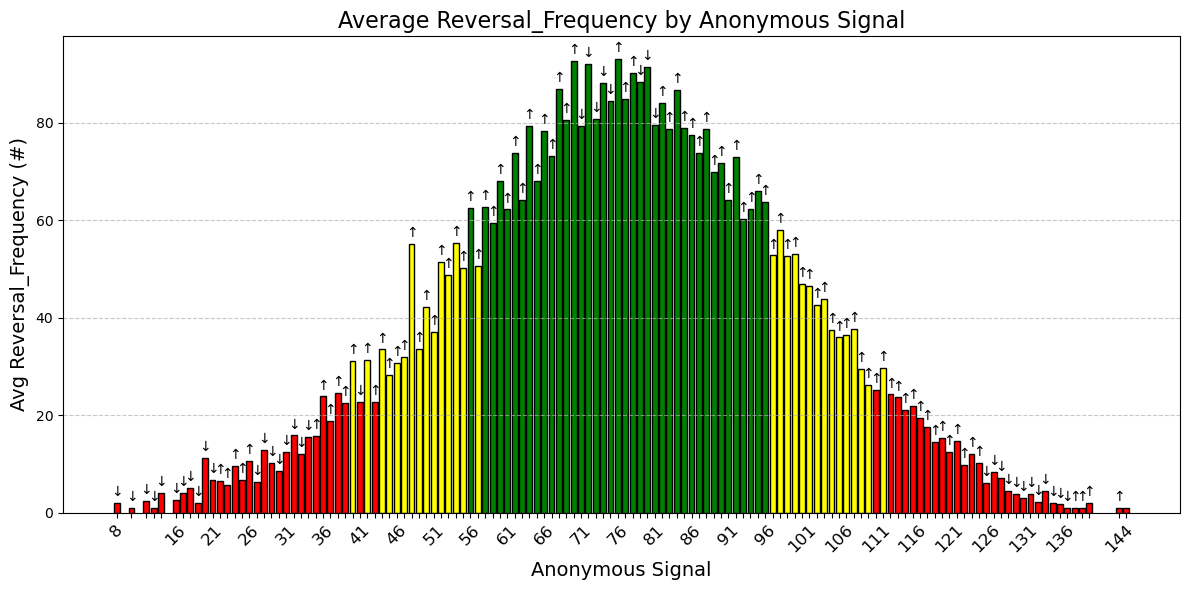

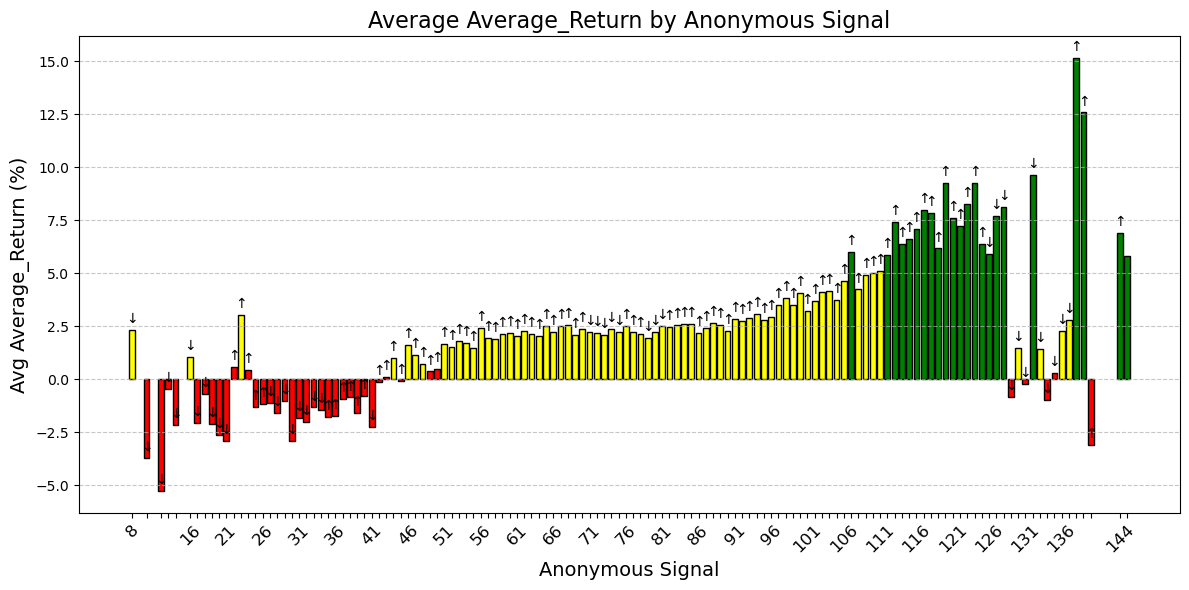

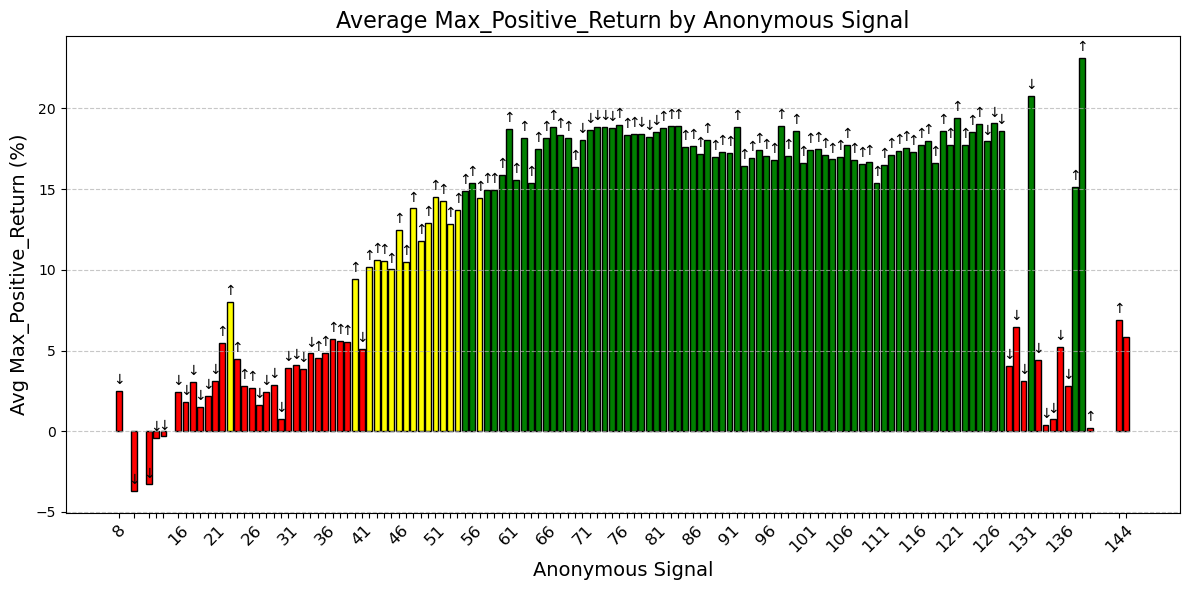

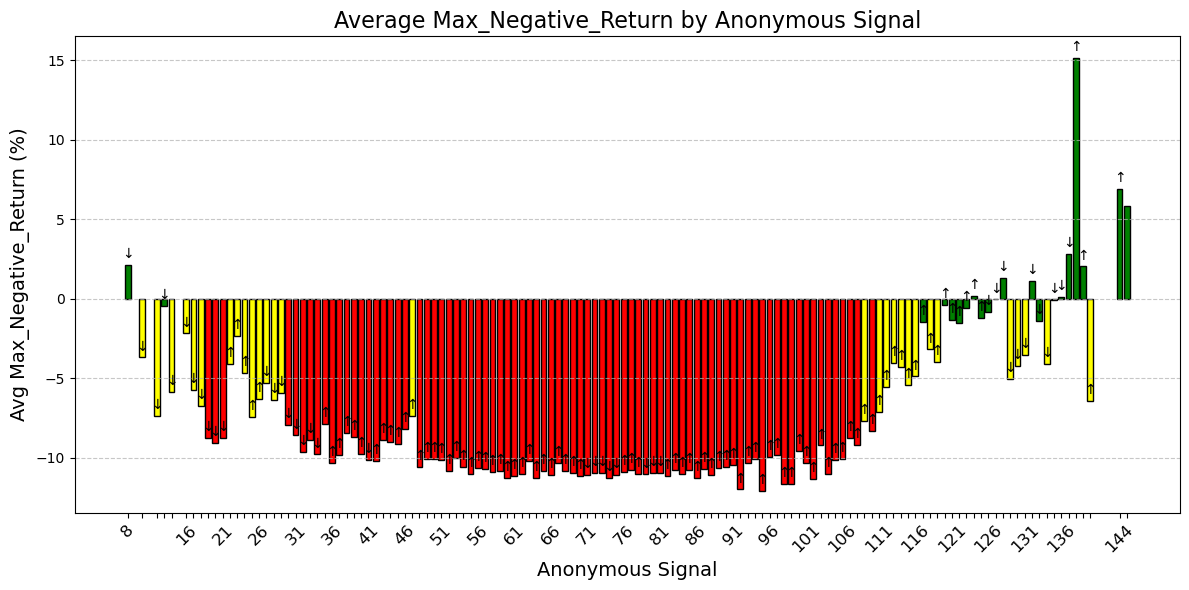

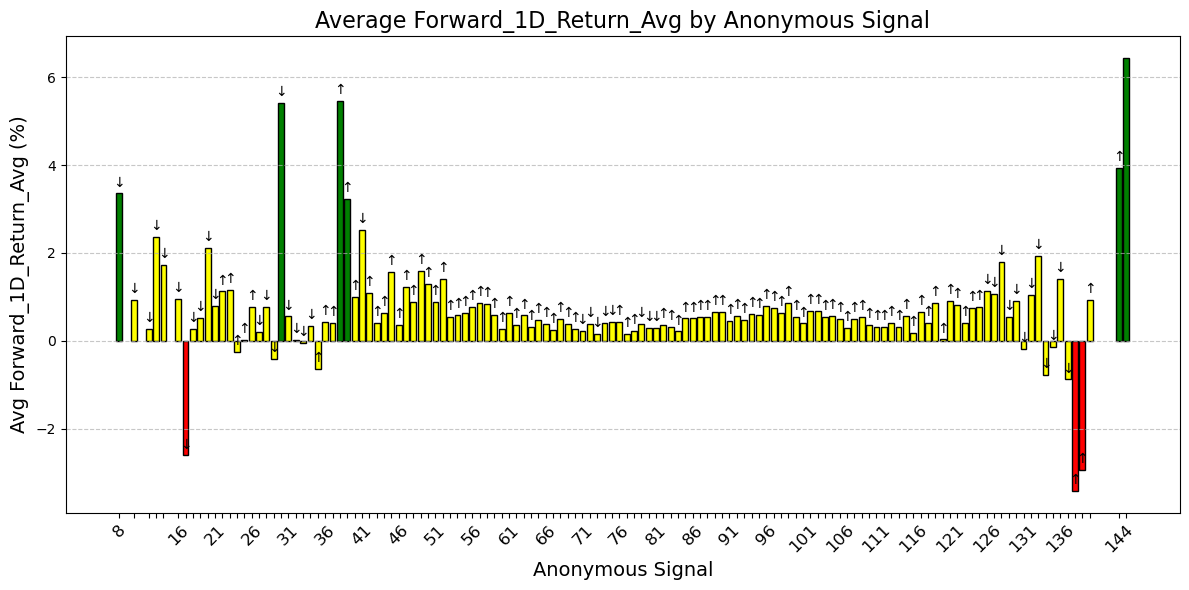

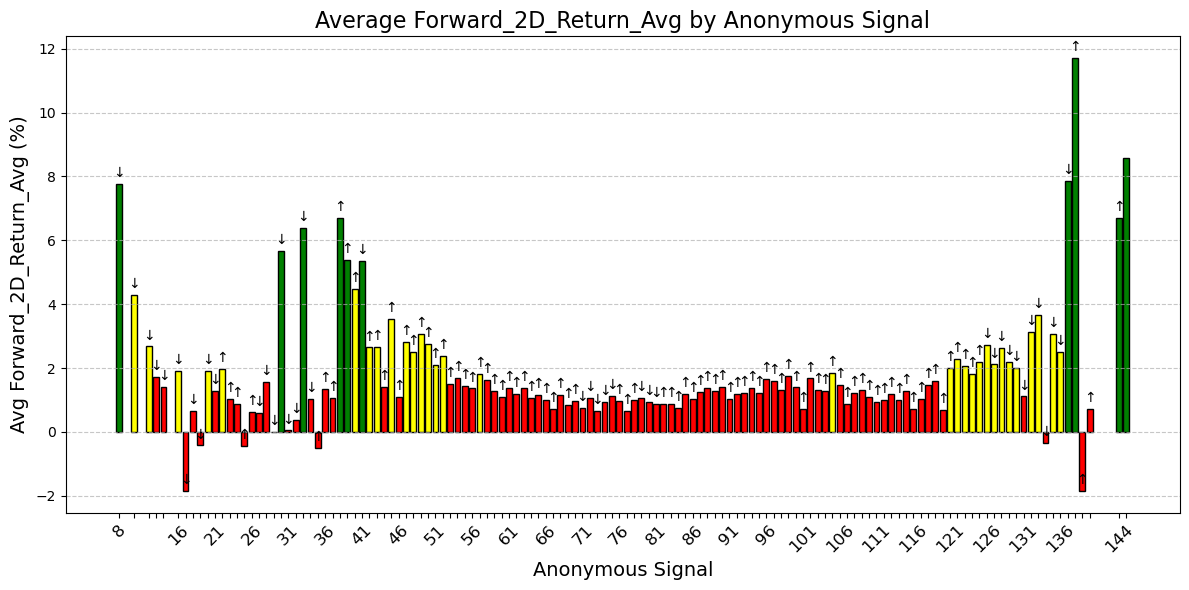

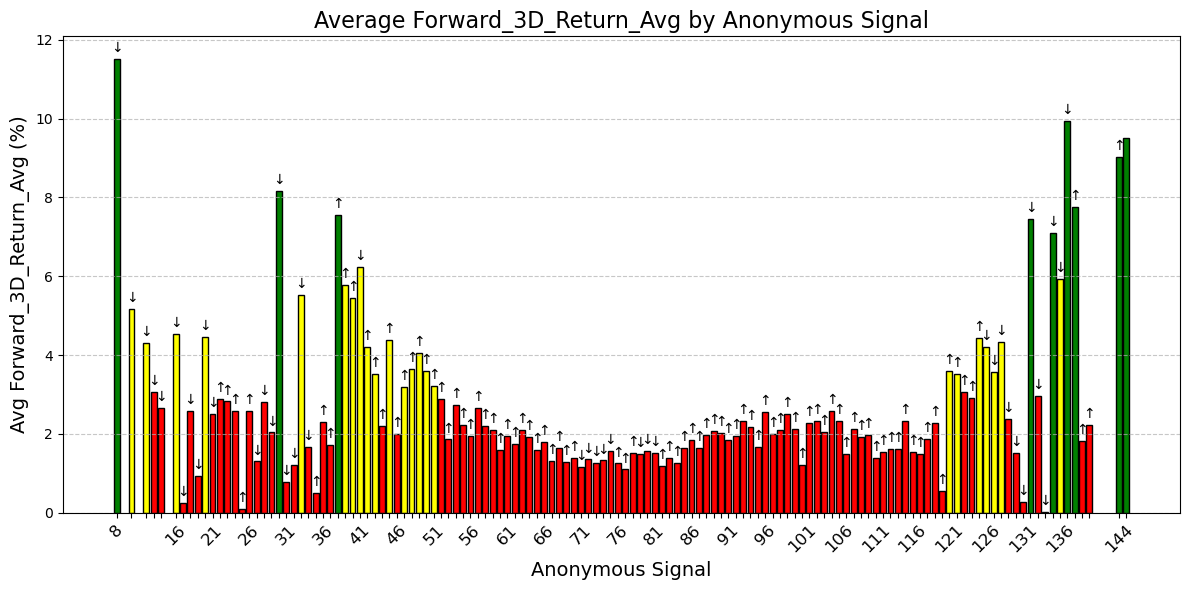

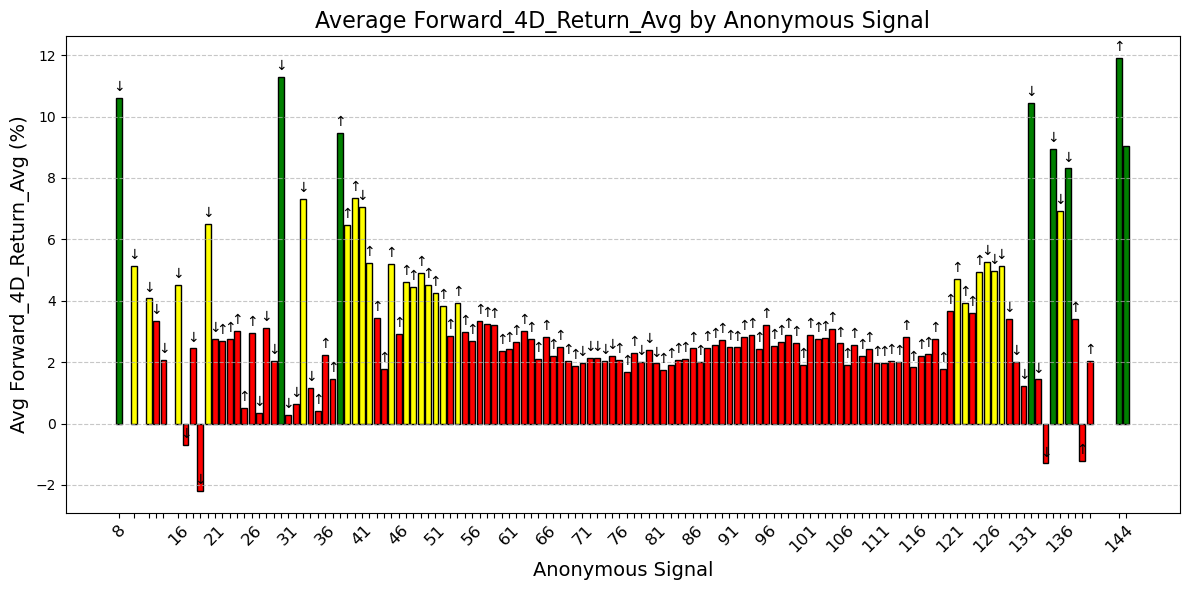

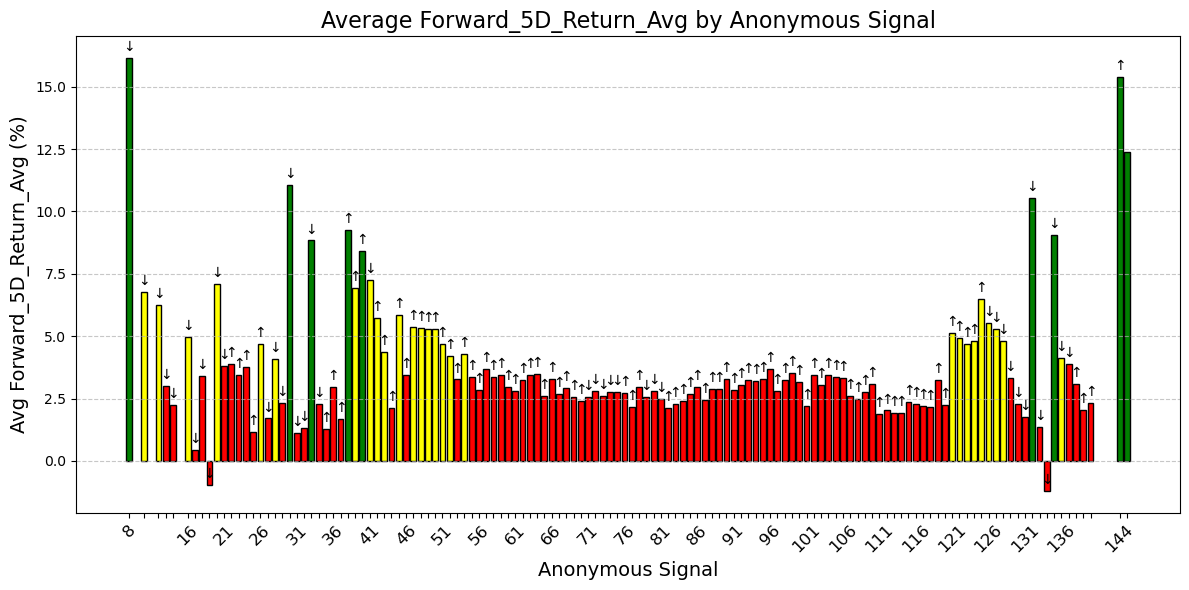

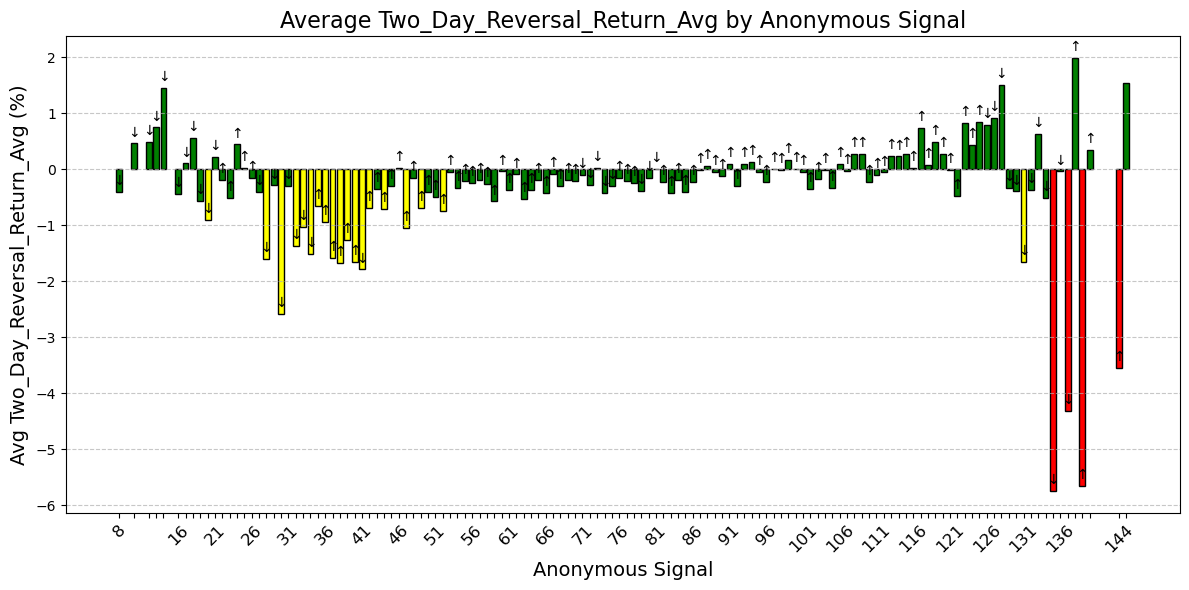

In [361]:
# List of return value columns and their bin equivalents
return_columns = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Define color mapping for bins
bin_colors = {"low": "red", "med": "yellow", "high": "green"}

# Plot each return column with its bins
for return_column in return_columns:
    # Map colors to the bars based on the bin column
    bar_colors = df_combined_avg[f"{return_column}_bin"].map(bin_colors)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_combined_avg["anonymous signal"],
        df_combined_avg[return_column],
        color=bar_colors,
        edgecolor="black"
    )

    # Add arrows for Trend_Change
    for i, signal in enumerate(df_combined_avg["anonymous signal"]):
        if i < len(df_combined_avg) - 1:  # Avoid the last index for arrow placement
            trend_change = df_combined_avg.loc[i, "Trend_Change"]
            arrow = "↑" if trend_change == 1 else "↓"
            plt.annotate(
                arrow,
                (signal, df_combined_avg.loc[i, return_column]),  # Position at the top of the bar
                textcoords="offset points",
                xytext=(0, 5),  # Offset to position the arrow slightly above the bar
                ha="center",  # Horizontal alignment
                fontsize=10,
                color="black"
            )

    # Add title and labels
    plt.title(f"Average {return_column} by Anonymous Signal", fontsize=16)
    plt.xlabel("Anonymous Signal", fontsize=14)

    return_column_label = f"Avg {return_column} (%)" if "Return" in return_column else f"Avg {return_column} (#)"
    plt.ylabel(return_column_label, fontsize=14)

    # Display every 5th signal on the x-axis
    x_positions = df_combined_avg["anonymous signal"]
    x_labels = [label if i % 5 == 0 else "" for i, label in enumerate(x_positions)]
    plt.xticks(df_combined_avg["anonymous signal"], x_labels, rotation=45, fontsize=12)

    # Add grid for better readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


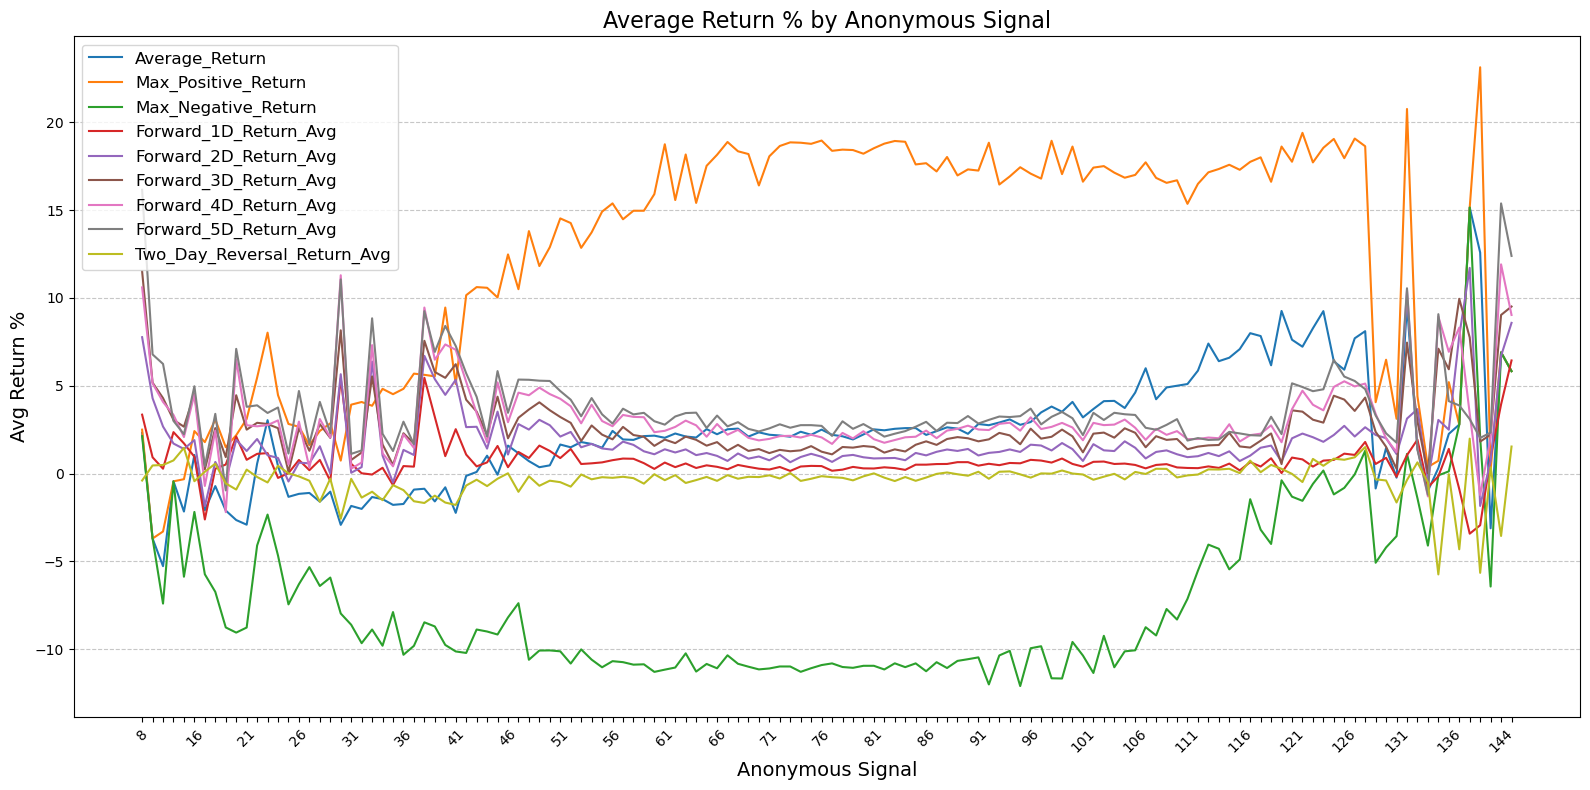

In [362]:
# List of columns to plot
columns_to_plot = [
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Determine x-tick positions to show every 10th signal
x_positions = range(len(df_combined_avg["anonymous signal"]))
x_labels = df_combined_avg["anonymous signal"]
x_ticks_to_display = [x_labels[i] if i % 5 == 0 else "" for i in x_positions]

# Plot each column with a different color
plt.figure(figsize=(16, 8))
for column in columns_to_plot:
    plt.plot(
        x_positions,  # x-axis (use index for spacing)
        df_combined_avg[column],  # y-axis
        label=column  # Label for the legend
    )

# Add title and labels
plt.title("Average Return % by Anonymous Signal", fontsize=16)
plt.xlabel("Anonymous Signal", fontsize=14)
plt.ylabel("Avg Return %", fontsize=14)

# Rotate x-axis labels and display only selected ones
plt.xticks(x_positions, x_ticks_to_display, rotation=45, fontsize=10)

# Add a legend to differentiate lines
plt.legend(loc="upper left", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In the following graphs we will use a hollistic bin color. This bin is a multidimentional clustering of each of the dataframe variables. Taking all of the variables into consideration, create a bin. I find this to most correlate to a signal indicating a "safe" bet on a stock.


In the following graphs, we will use a holistic bin color to represent clusters of stocks based on their multidimensional characteristics. This bin is determined by applying KMeans clustering to all numeric variables in the DataFrame simultaneously. Each stock is assigned to a cluster based on the combined behavior of its variables. These clusters are then labeled as low, med, or high based on their relative positions in the data.

By considering all variables together, the unified bin provides a comprehensive view of each stock’s overall profile. This approach is particularly useful for identifying patterns or signals that correlate with a "safe" bet on a stock, as it captures the combined influence of multiple variables.

In [363]:
df_combined_sorted = df_combined.sort_values(by='anonymous signal', ascending=True)  # Use ascending=False for descending order
df_combined_sorted

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
96,8,2,2.315000,2.50,2.13,3.355000,7.765000,11.515,10.60,16.155000,-0.395000,AVGO
195,10,1,-6.870000,-6.87,-6.87,-0.560000,2.680000,1.930,2.42,2.250000,0.800000,MRNA
97,10,1,2.650000,2.65,2.65,3.900000,7.510000,11.670,10.58,15.850000,-0.210000,AVGO
1016,10,1,-6.870000,-6.87,-6.87,-0.560000,2.680000,1.930,2.42,2.250000,0.800000,MRNA
98,12,3,2.153333,2.23,2.10,3.163333,8.343333,11.180,10.75,16.363333,-0.513333,AVGO
...,...,...,...,...,...,...,...,...,...,...,...,...
1260,139,1,12.580000,23.13,2.03,-2.940000,-1.840000,1.820,-1.22,2.030000,-5.650000,MSTR
1142,140,2,-3.115000,0.20,-6.43,0.935000,0.720000,2.215,2.05,2.335000,0.355000,MRNA
321,140,2,-3.115000,0.20,-6.43,0.935000,0.720000,2.215,2.05,2.335000,0.355000,MRNA
1261,144,1,6.900000,6.90,6.90,3.940000,6.700000,9.030,11.91,15.380000,-3.550000,MSTR


the rolling average between tickers is not retained in the code provided. The rolling average calculations (Short_MA and Long_MA) are applied independently within each ticker group. This ensures that the moving averages are calculated based only on the data within a single ticker, and values do not "spill over" between tickers.

In [364]:
# Assume df_combined is your DataFrame and 'Ticker' is the column identifying different tickers

# Ensure non-numeric columns are excluded for rolling calculations
numeric_columns = df_combined.select_dtypes(include=["number"])

# Group the DataFrame by Ticker
ticker_groups = df_combined.groupby("Ticker")

# Create an empty dictionary to hold dataframes for each ticker
ticker_dfs = {}

# Process each Ticker group
for ticker, group in ticker_groups:
    # Retain the original order of rows
    group = group.sort_index()

    # Calculate Short_MA and Long_MA for Average_Return
    group["Short_MA"] = group["Average_Return"].rolling(window=3).mean()
    group["Long_MA"] = group["Average_Return"].rolling(window=10).mean()

    # Fill missing values
    group["Short_MA"] = group["Short_MA"].ffill().bfill()
    group["Long_MA"] = group["Long_MA"].ffill().bfill()

    # Identify trend changes
    group["Trend_Change"] = (group["Short_MA"] > group["Long_MA"]).astype(int)

    # Store the processed DataFrame in the dictionary
    ticker_dfs[ticker] = group

# Example: Access the DataFrame for a specific ticker
# df_ticker1 = ticker_dfs["AAPL"]  # Replace "AAPL" with your desired ticker symbol

# Combine all processed tickers into a single DataFrame (optional)
df_combined_processed = pd.concat(ticker_dfs.values())


In [365]:
df_combined_processed

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker,Short_MA,Long_MA,Trend_Change
13,45,1,-5.150000,-5.15,-5.15,-0.799091,1.020909,2.888182,4.854545,6.222727,-0.3600,AMD,1.351111,5.312896,0
14,46,1,1.780000,8.46,-4.90,0.423750,1.887500,3.858750,6.262500,7.085000,-0.3200,AMD,1.351111,5.312896,0
15,47,2,7.423333,8.39,5.51,3.408333,5.505000,5.818333,7.820000,9.175000,0.8350,AMD,1.351111,5.312896,0
17,49,1,8.175000,14.02,1.40,1.923043,3.685652,5.322727,7.403182,8.392727,-3.8500,AMD,5.792778,5.312896,1
18,50,3,7.690000,10.83,1.81,1.322857,2.654286,4.132308,6.865385,8.374615,-2.2700,AMD,7.762778,5.312896,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,115,5,14.005000,24.43,-10.05,-0.854000,-1.585000,-0.946667,-2.183333,-8.180000,-0.7420,TSLA,18.304167,17.008078,1
1447,116,1,21.378000,23.26,18.03,-1.484167,-3.162500,-5.554000,-3.413750,-6.862857,-0.0800,TSLA,18.665167,17.515307,1
1448,117,4,19.566667,21.47,18.04,-0.436364,-3.053750,-4.277500,-3.070000,-7.708000,-2.0375,TSLA,18.316556,17.774174,1
1449,118,2,21.890000,23.50,18.00,-2.105556,-2.912500,-2.570000,-2.753333,-8.560000,-1.0350,TSLA,20.944889,18.359624,1


In [366]:
ignore = ['Forward_2D_Return_Avg', 'Forward_3D_Return_Avg', 'Forward_4D_Return_Avg', 'Forward_5D_Return_Avg']

# Step 1: Define dependent and independent variables
dependent_var = 'Forward_1D_Return_Avg'
independent_vars = [
    col for col in df_combined.columns 
    if col not in [dependent_var, 'Ticker'] and '_bin' not in col and col not in ignore
]

In [367]:
# Calculate VIF for each feature
X = df_combined[independent_vars]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,anonymous signal,3.222535
1,Reversal_Frequency,2.274026
2,Average_Return,10.235574
3,Max_Positive_Return,12.703321
4,Max_Negative_Return,6.724016
5,Two_Day_Reversal_Return_Avg,1.269885


In [368]:
# Step 2: Prepare the data
y = df_combined[dependent_var]

# Step 3: Fit the model using Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Get coefficients
coefficients = pd.DataFrame({
    'Feature': independent_vars,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

# Step 5: Evaluate model performance
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))


                       Feature  Coefficient
4          Max_Negative_Return     0.118204
3          Max_Positive_Return     0.109063
1           Reversal_Frequency    -0.003026
0             anonymous signal    -0.009297
2               Average_Return    -0.085766
5  Two_Day_Reversal_Return_Avg    -0.663562
R-squared: 0.29683448105920396


In [369]:
# Prepare the data
ignore = ['Forward_2D_Return_Avg', 'Forward_3D_Return_Avg', 'Forward_4D_Return_Avg', 'Forward_5D_Return_Avg']

# Step 1: Define dependent and independent variables
dependent_var = 'Forward_1D_Return_Avg'
independent_vars = [
    col for col in df_combined_processed.columns 
    if col not in [dependent_var, 'Ticker'] and '_bin' not in col and col not in ignore
]

# Calculate VIF for each feature
X = df_combined_processed[independent_vars]
y = df_combined_processed["Forward_1D_Return_Avg"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Lasso Regression
lasso = Lasso(alpha=0.01)  # Adjust alpha for stronger/weaker regularization
lasso.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({
    "Feature": independent_vars,  # Use the correct list of independent variables
    "Coefficient": lasso.coef_    # Coefficients from Lasso
}).sort_values(by="Coefficient", ascending=False)


In [370]:
importance

,Feature,Coefficient
7,Long_MA,2.916695
3,Max_Positive_Return,1.395500
4,Max_Negative_Return,0.597325
8,Trend_Change,0.386254
1,Reversal_Frequency,-0.155975
0,anonymous signal,-0.282013
6,Short_MA,-0.786470
5,Two_Day_Reversal_Return_Avg,-0.927008
2,Average_Return,-2.547007


In [371]:
# Calculate VIF for each feature
X = df_combined_processed[independent_vars]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,anonymous signal,3.937828
1,Reversal_Frequency,2.296868
2,Average_Return,44.585396
3,Max_Positive_Return,12.841679
4,Max_Negative_Return,6.901426
5,Two_Day_Reversal_Return_Avg,1.345963
6,Short_MA,84.291302
7,Long_MA,36.800723
8,Trend_Change,3.112444


In [372]:
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.2545631583782121
Mean Squared Error: 5.167702513043528


In [373]:
X.corr()

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Two_Day_Reversal_Return_Avg,Short_MA,Long_MA,Trend_Change
anonymous signal,1.000000,0.015622,0.250012,0.218132,0.167750,0.174074,0.244787,0.233254,0.097035
Reversal_Frequency,0.015622,1.000000,-0.030477,0.109988,-0.315015,0.098589,-0.033015,-0.044610,0.066340
Average_Return,0.250012,-0.030477,1.000000,0.855249,0.574105,0.447485,0.985058,0.960151,0.283401
Max_Positive_Return,0.218132,0.109988,0.855249,1.000000,0.210990,0.439418,0.846366,0.817297,0.254360
Max_Negative_Return,0.167750,-0.315015,0.574105,0.210990,1.000000,0.209930,0.569944,0.576656,0.126102
Two_Day_Reversal_Return_Avg,0.174074,0.098589,0.447485,0.439418,0.209930,1.000000,0.424415,0.378979,0.199366
Short_MA,0.244787,-0.033015,0.985058,0.846366,0.569944,0.424415,1.000000,0.980743,0.268302
Long_MA,0.233254,-0.044610,0.960151,0.817297,0.576656,0.378979,0.980743,1.000000,0.174644
Trend_Change,0.097035,0.066340,0.283401,0.254360,0.126102,0.199366,0.268302,0.174644,1.000000


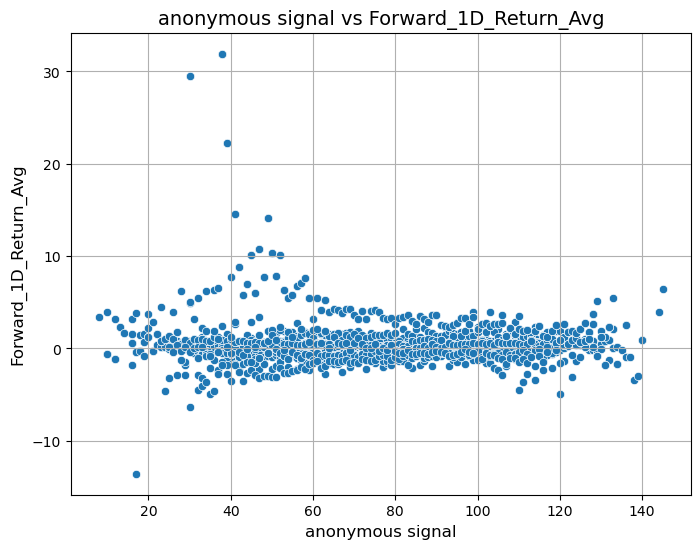

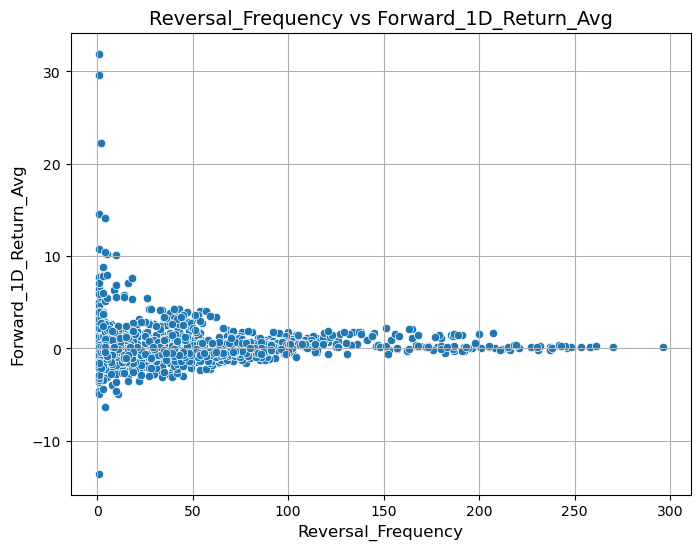

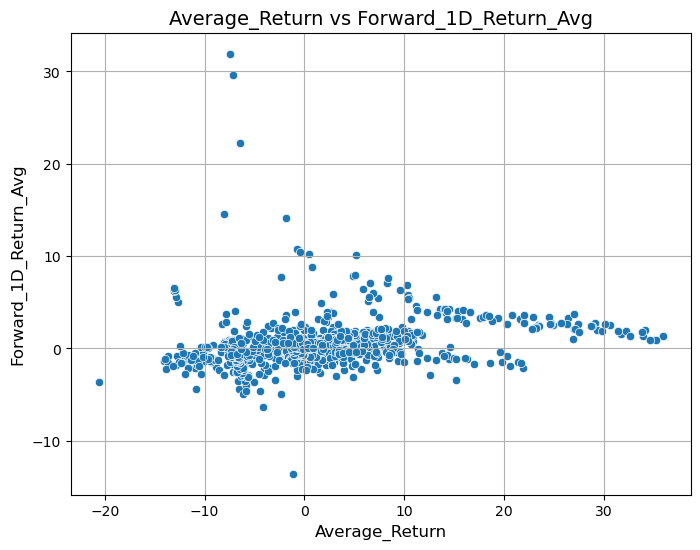

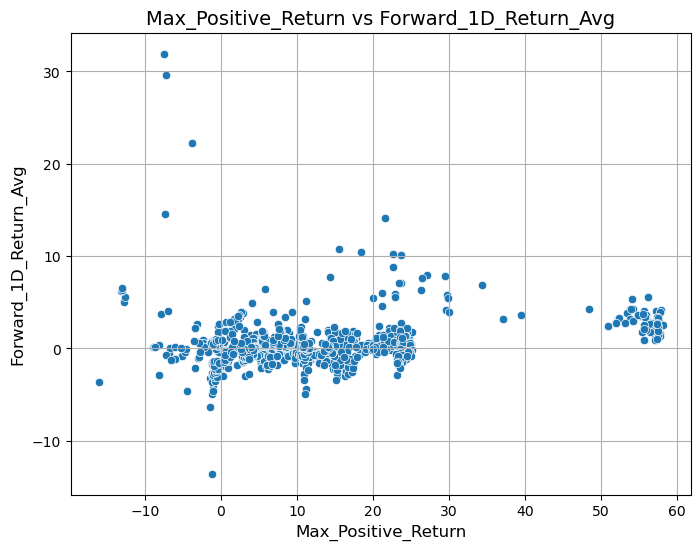

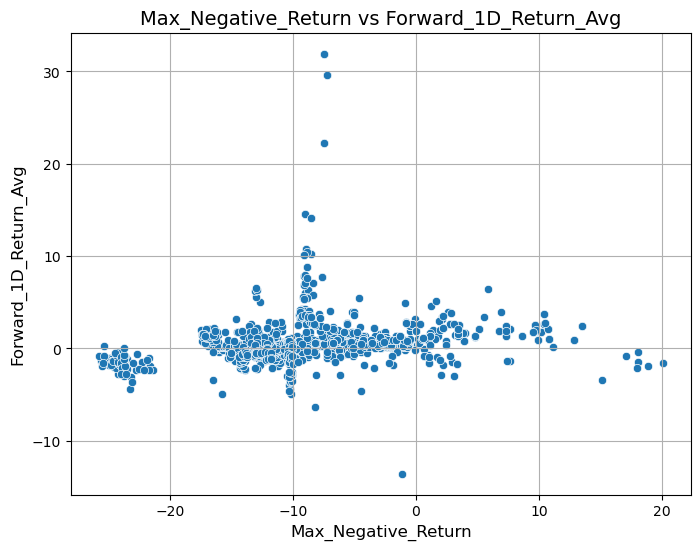

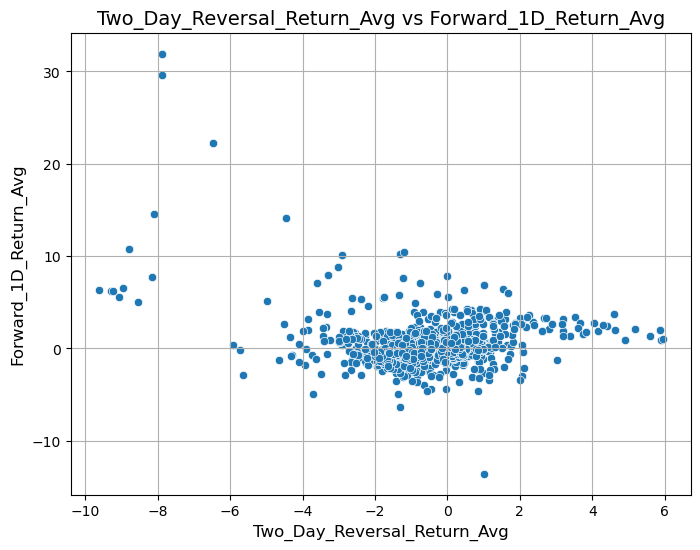

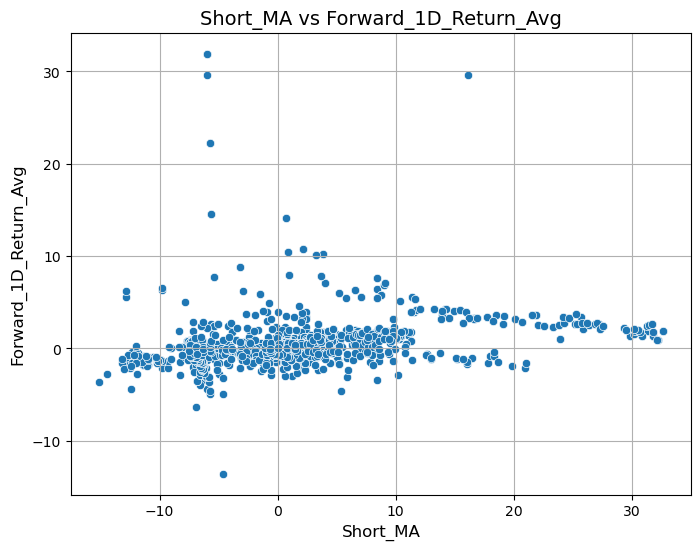

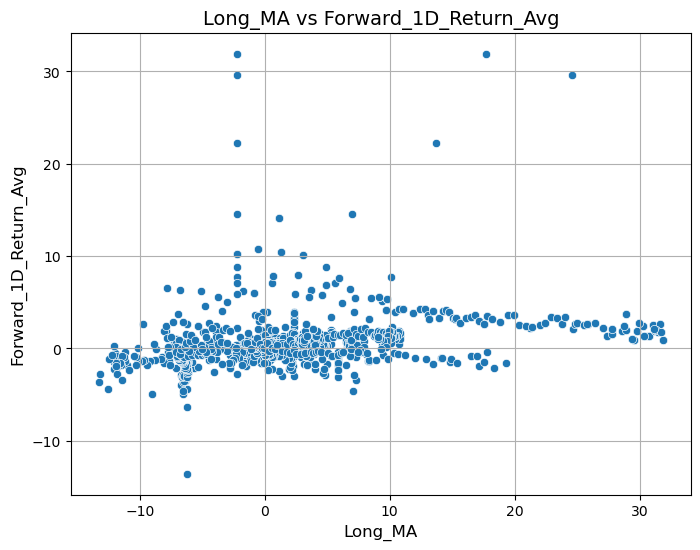

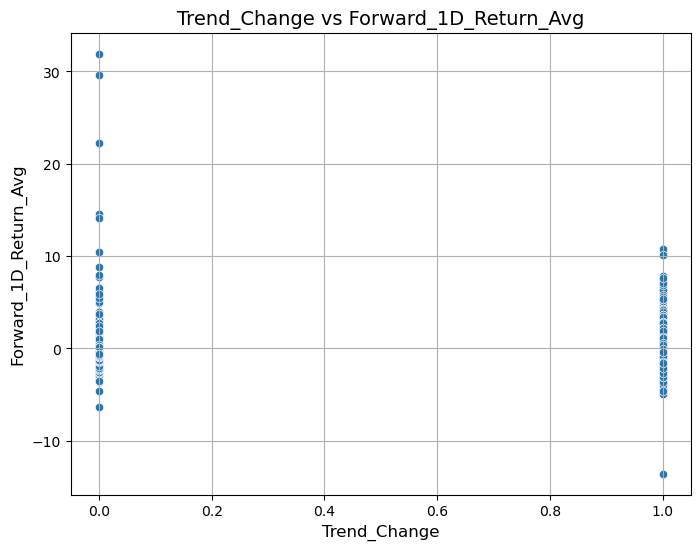

In [374]:
# Assuming X contains your independent variables and y is the target variable
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f"{feature} vs Forward_1D_Return_Avg", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Forward_1D_Return_Avg", fontsize=12)
    plt.grid(True)
    plt.show()

                             anonymous signal  Reversal_Frequency  \
anonymous signal                     1.000000           -0.008185   
Reversal_Frequency                  -0.008185            1.000000   
Average_Return                       0.732010            0.034171   
Max_Positive_Return                  0.496764            0.660178   
Max_Negative_Return                  0.394727           -0.717140   
Forward_2D_Return_Avg                0.085610           -0.301633   
Forward_3D_Return_Avg                0.031330           -0.431885   
Forward_4D_Return_Avg                0.036945           -0.270720   
Forward_5D_Return_Avg               -0.050702           -0.278537   
Two_Day_Reversal_Return_Avg          0.026380            0.107934   
Short_MA                             0.848412            0.048123   
Long_MA                              0.915423            0.022506   
Trend_Change                         0.151748            0.347820   

                             Aver

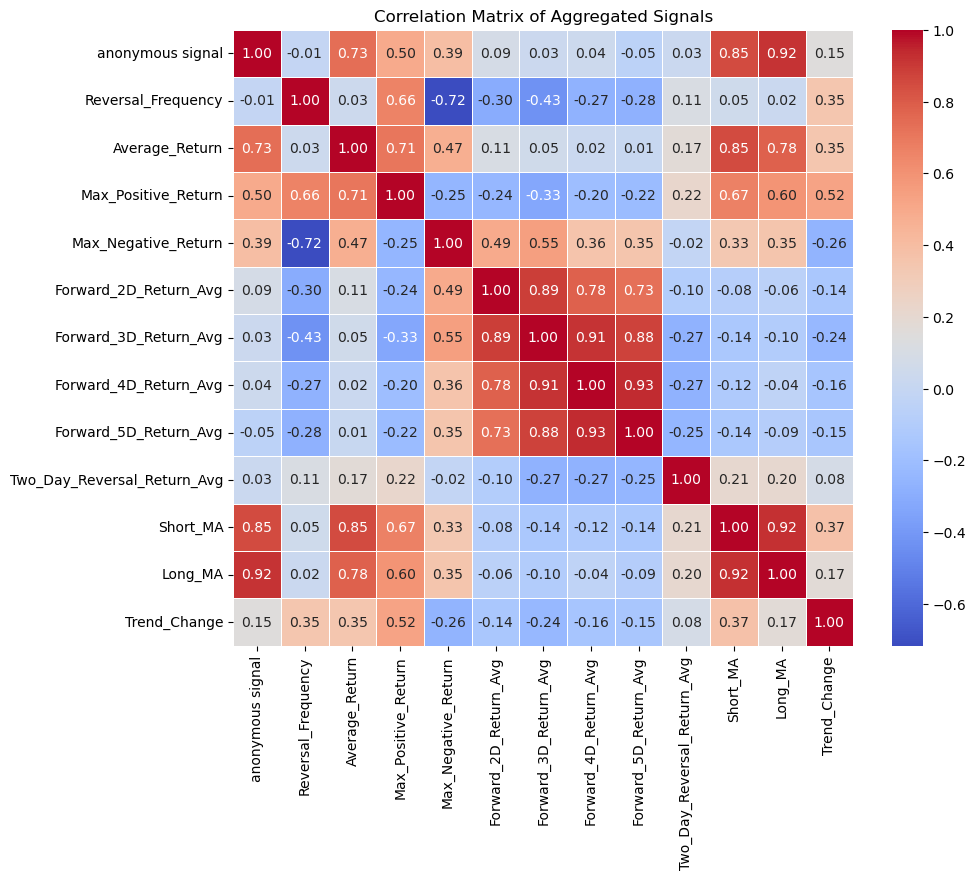

In [375]:
ignore = []
independent_vars = [
    col for col in df_combined_processed.columns 
    if col not in [dependent_var, 'Ticker'] and '_bin' not in col and col not in ignore
]

# Calculate correlation matrix for the aggregated signals
signal_correlation = df_combined_avg[independent_vars].corr()

# Display the correlation matrix
print(signal_correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(signal_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Aggregated Signals")
plt.show()
